# Logistic Regression


![newsgroups_minimality_not_normalized.png](data: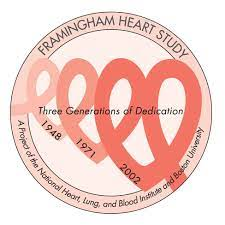)


# Introduction

### Task Description

The **World Health Organization (WHO)** estimates that 12 million people die annually due to heart disease. In the United States and other developed nations, cardiovascular diseases account for fifty percent of all deaths. The early prognosis of cardiovascular disease might help high-risk individuals make decisions regarding lifestyle adjustments, thereby reducing medical problems. This study aims to identify the most significant heart disease risk variables and forecast the overall risk using logistic regression.

### **Pipeline**:
1. Exploration of the Dataset. Load the .csv and visualize the structure of it.
2. Define a Simple Classifier. Then we will build a simple classifer for predicting the 10 year risk of coronary heart disease (CHD). This will be the baseline.
3. Data Exploration. Let's now train a model. The first step is to prepare the data used by the training algorithm.
4. Training. Define the Logistic Regression Model and train it.
5. Evaluate the classifier.
6. Visualise the results.


### Dataset
The dataset is accessible to the public on the Kaggle website and comes from an ongoing cardiovascular research of Framingham, Massachusetts people. The objective of classification is to determine whether a patient has a 10-year risk of developing coronary heart disease (CHD). The dataset contains information on patients. It has 3,658 records and 16 attributes. Each attribute is a possible risk factor. There are both demographic and behavioral risk factors, as well as medical ones.

#### **Attributes**:

* **Demographic**:
    * Sex: male or female (Nominal)
    * Age: Age of the patient; (Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
    * Education: no further information provided


* **Behavioral**:
    * Current Smoker: whether or not the patient is a current smoker (Nominal)
    * Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)
* **Information on medical history**:
    * BP Meds: whether or not the patient was on blood pressure medication (Nominal)
    * Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
    * Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
    * Diabetes: whether or not the patient had diabetes (Nominal)


* **Information on current medical condition**:
    * Tot Chol: total cholesterol level (Continuous)
    * Sys BP: systolic blood pressure (Continuous)
    * Dia BP: diastolic blood pressure (Continuous)
    * BMI: Body Mass Index (Continuous)
    * Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
    * Glucose: glucose level (Continuous)


* **Target variable to predict**:
    * 10 year risk of coronary heart disease (CHD) - (binary: “1”, means “Yes”, “0” means “No”)


# Data Exploration
Navigate to the directory containing the file containing the data: framingham.csv

#### Only for Colab

Since Google Colab is an online service, a file must be uploaded to Colab's local file system in order for its contents to be accessed. This procedure consists of the following steps:
1. Navigate to Colab's local file system
2. Press the Upload button and then choose the file to upload (framingham.csv)
3. Verify that the upload was completed successfully by locating the file in your local file system.
The Figure below depicts step-by-step the procedure described above.

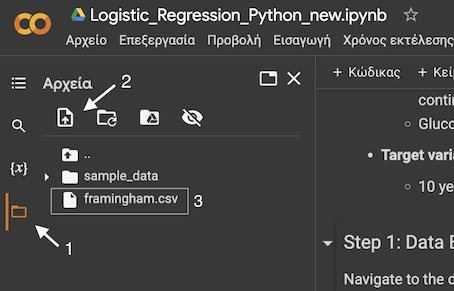


## Load the Data

We are going to use Pandas to load the CSV file. Pandas is a powerful Python library for data manipulation and analysis. It provides various functions and data structures that make it easy to work with structured data. One of the key features of Pandas is its ability to read and write data from different file formats, including CSV (Comma-Separated Values).

To load a CSV file using Pandas, we can use the read_csv() function. This function takes the file path of the CSV file as an argument and returns a DataFrame object, which is a two-dimensional tabular data structure. The DataFrame represents the CSV data in a structured format, with rows and columns.

For example, if we have a CSV file named "data.csv" located in our working directory, we can load it into a DataFrame by calling pd.read_csv('data.csv'), assuming we have imported Pandas as pd. This will read the CSV file and create a DataFrame object.

Once the CSV file is loaded into a DataFrame, we can perform various operations on the data. We can access specific columns, filter rows based on certain conditions, perform aggregations, and visualize the data using Pandas and other visualization libraries like Matplotlib or Seaborn.

Pandas also provides functions to handle missing values, convert data types, rename columns, and perform other data preprocessing tasks. It offers a rich set of tools for data cleaning, preparation, and transformation.

In summary, by using Pandas to load a CSV file, we can easily access and manipulate the data using the DataFrame structure. Pandas simplifies the process of reading and working with tabular data, making it an essential tool for data analysis and manipulation tasks in Python.







In [4]:
import pandas as pd
framingham = pd.read_csv("framingham.csv") # load the dataset


The .head() function is a method in Pandas that allows you to quickly preview the first few rows of a DataFrame. By default, it displays the first five rows of the DataFrame.

For example, if you have a DataFrame named df and you call df.head(), it will return the first five rows of the DataFrame. This is useful to get a glimpse of the data and its structure, especially when dealing with large datasets. It allows you to check the column names, data types, and sample values in the initial rows of the DataFrame.

You can also pass an optional integer argument to the .head() function to specify the number of rows you want to display. For instance, df.head(10) will show the first ten rows of the DataFrame.

The .head() function helps in quickly assessing the structure and content of a DataFrame, providing a concise overview before diving into further analysis or data manipulation.

In [2]:
framingham.head() # using the method head

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39          4              0           0       0                0   
1     0   46          2              0           0       0                0   
2     1   48          1              1          20       0                0   
3     0   61          3              1          30       0                0   
4     0   46          3              1          23       0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0      195  106.0   70.0  26.97         80       77   
1             0         0      250  121.0   81.0  28.73         95       76   
2             0         0      245  127.5   80.0  25.34         75       70   
3             1         0      225  150.0   95.0  28.58         65      103   
4             0         0      285  130.0   84.0  23.10         85       85   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0

The `.info()` function in Pandas provides a concise summary of a DataFrame, presenting information about column names, data types, non-null values, and memory usage. It serves as a valuable tool for understanding and assessing the structure and properties of your data.

When you call `.info()` on a DataFrame, it displays the following information:

1. The total number of entries (rows) in the DataFrame.
2. The number of columns and their names.
3. The count of non-null values in each column.
4. The data type of each column.
5. The memory usage of the DataFrame.

In [3]:
framingham.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3658 entries, 0 to 3657
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3658 non-null   int64  
 1   age              3658 non-null   int64  
 2   education        3658 non-null   int64  
 3   currentSmoker    3658 non-null   int64  
 4   cigsPerDay       3658 non-null   int64  
 5   BPMeds           3658 non-null   int64  
 6   prevalentStroke  3658 non-null   int64  
 7   prevalentHyp     3658 non-null   int64  
 8   diabetes         3658 non-null   int64  
 9   totChol          3658 non-null   int64  
 10  sysBP            3658 non-null   float64
 11  diaBP            3658 non-null   float64
 12  BMI              3658 non-null   float64
 13  heartRate        3658 non-null   int64  
 14  glucose          3658 non-null   int64  
 15  TenYearCHD       3658 non-null   int64  
dtypes: float64(3), int64(13)
memory usage: 457.4 KB


The dataset contains the following information:

* 3658 rows
* 16 columns
* Non-null values in all columns
* All values are numerical
* Some values are encoded as integers



## View the data


The `.describe()` function in pandas is used to generate descriptive statistics of a DataFrame or Series. It provides a summary of the central tendency, dispersion, and shape of a dataset's distribution, excluding NaN values.

When applied to a DataFrame, `.describe()` returns various statistics for each numeric column in the DataFrame. These statistics include count, mean, standard deviation, minimum, quartiles (25%, 50%, 75%), and maximum values.

Here's an overview of the statistics provided by `.describe()`:

- **count**: The number of non-null values in each column.
- **mean**: The average (arithmetic mean) of the values.
- **std**: The standard deviation, which measures the spread of the values around the mean.
- **min**: The minimum value in the column.
- **25%**: The 25th percentile, also known as the first quartile. It represents the value below which 25% of the data falls.
- **50%**: The 50th percentile, also known as the median. It represents the value below which 50% of the data falls.
- **75%**: The 75th percentile, also known as the third quartile. It represents the value below which 75% of the data falls.
- **max**: The maximum value in the column.

In [ ]:
framingham.describe()

male          age    education  currentSmoker   cigsPerDay  \
count  3658.000000  3658.000000  3658.000000    3658.000000  3658.000000   
mean      0.443685    49.551941     1.980317       0.489065     9.025424   
std       0.496886     8.562029     1.022656       0.499949    11.921590   
min       0.000000    32.000000     1.000000       0.000000     0.000000   
25%       0.000000    42.000000     1.000000       0.000000     0.000000   
50%       0.000000    49.000000     2.000000       0.000000     0.000000   
75%       1.000000    56.000000     3.000000       1.000000    20.000000   
max       1.000000    70.000000     4.000000       1.000000    70.000000   

            BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  3658.000000      3658.000000   3658.000000  3658.000000  3658.000000   
mean      0.030344         0.005741      0.311646     0.027064   236.847731   
std       0.171557         0.075561      0.463229     0.162292    44.097681   
min       0.000000         0.000000      0.000000     0.000000   113.000000   
25%       0.000000         0.000000      0.000000     0.000000   206.000000   
50%       0.000000         0.000000      0.000000     0.000000   234.000000   
75%       0.000000         0.000000      1.000000     0.000000   263.000000   
max       1.000000         1.000000      1.000000     1.000000   600.000000   

             sysBP        diaBP          BMI    heartRate      glucose  \
count  3658.000000  3658.000000  3658.000000  3658.000000  3658.000000   
mean    132.370558    82.917031    25.782802    75.730727    81.852925   
std      22.086866    11.974258     4.065601    11.981525    23.904164   
min      83.500000    48.000000    15.540000    44.000000    40.000000   
25%     117.000000    75.000000    23.080000    68.000000    71.000000   
50%     128.000000    82.000000    25.380000    75.000000    78.000000   
75%     143.875000    90.000000    28.037500    82.000000    87.000000   
max     295.000000   142.500000    56.800000   143.000000   394.000000   

        TenYearCHD  
count  3658.000000  
mean      0.152269  
std       0.359331  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

The `countplot` method in seaborn (often imported as `sns`) is a visualization function used to display the count of observations in each category of a categorical variable. It is particularly useful for exploring the distribution of categorical data and comparing the frequencies of different categories.

When using `sns.countplot`, you pass in the categorical variable as the x or y parameter, and the method automatically calculates and displays the count of occurrences for each category. The resulting plot consists of bars, where the height of each bar represents the count of observations in that category.

The countplot is a simple yet effective way to visualize the distribution and relative frequencies of categorical variables in a dataset. It can be further customized with various seaborn and matplotlib options to enhance the aesthetics or provide additional insights, such as adding labels, colors, or adjusting the plot orientation.

Overall, the `countplot` method in seaborn is a valuable tool for gaining a quick understanding of the distribution and count of categorical variables in your data.

<Axes: xlabel='TenYearCHD', ylabel='count'>

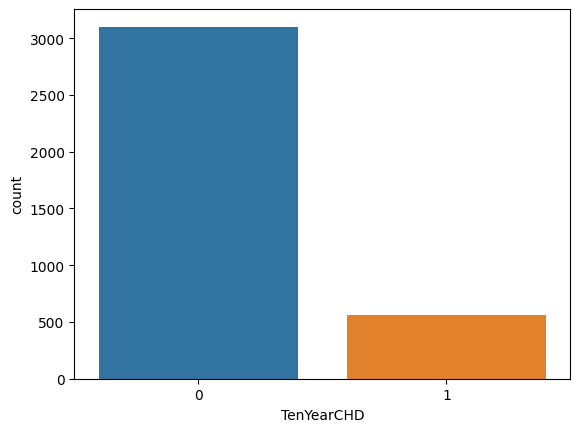

In [ ]:
import seaborn as sns
sns.countplot(x = 'TenYearCHD', data = framingham)

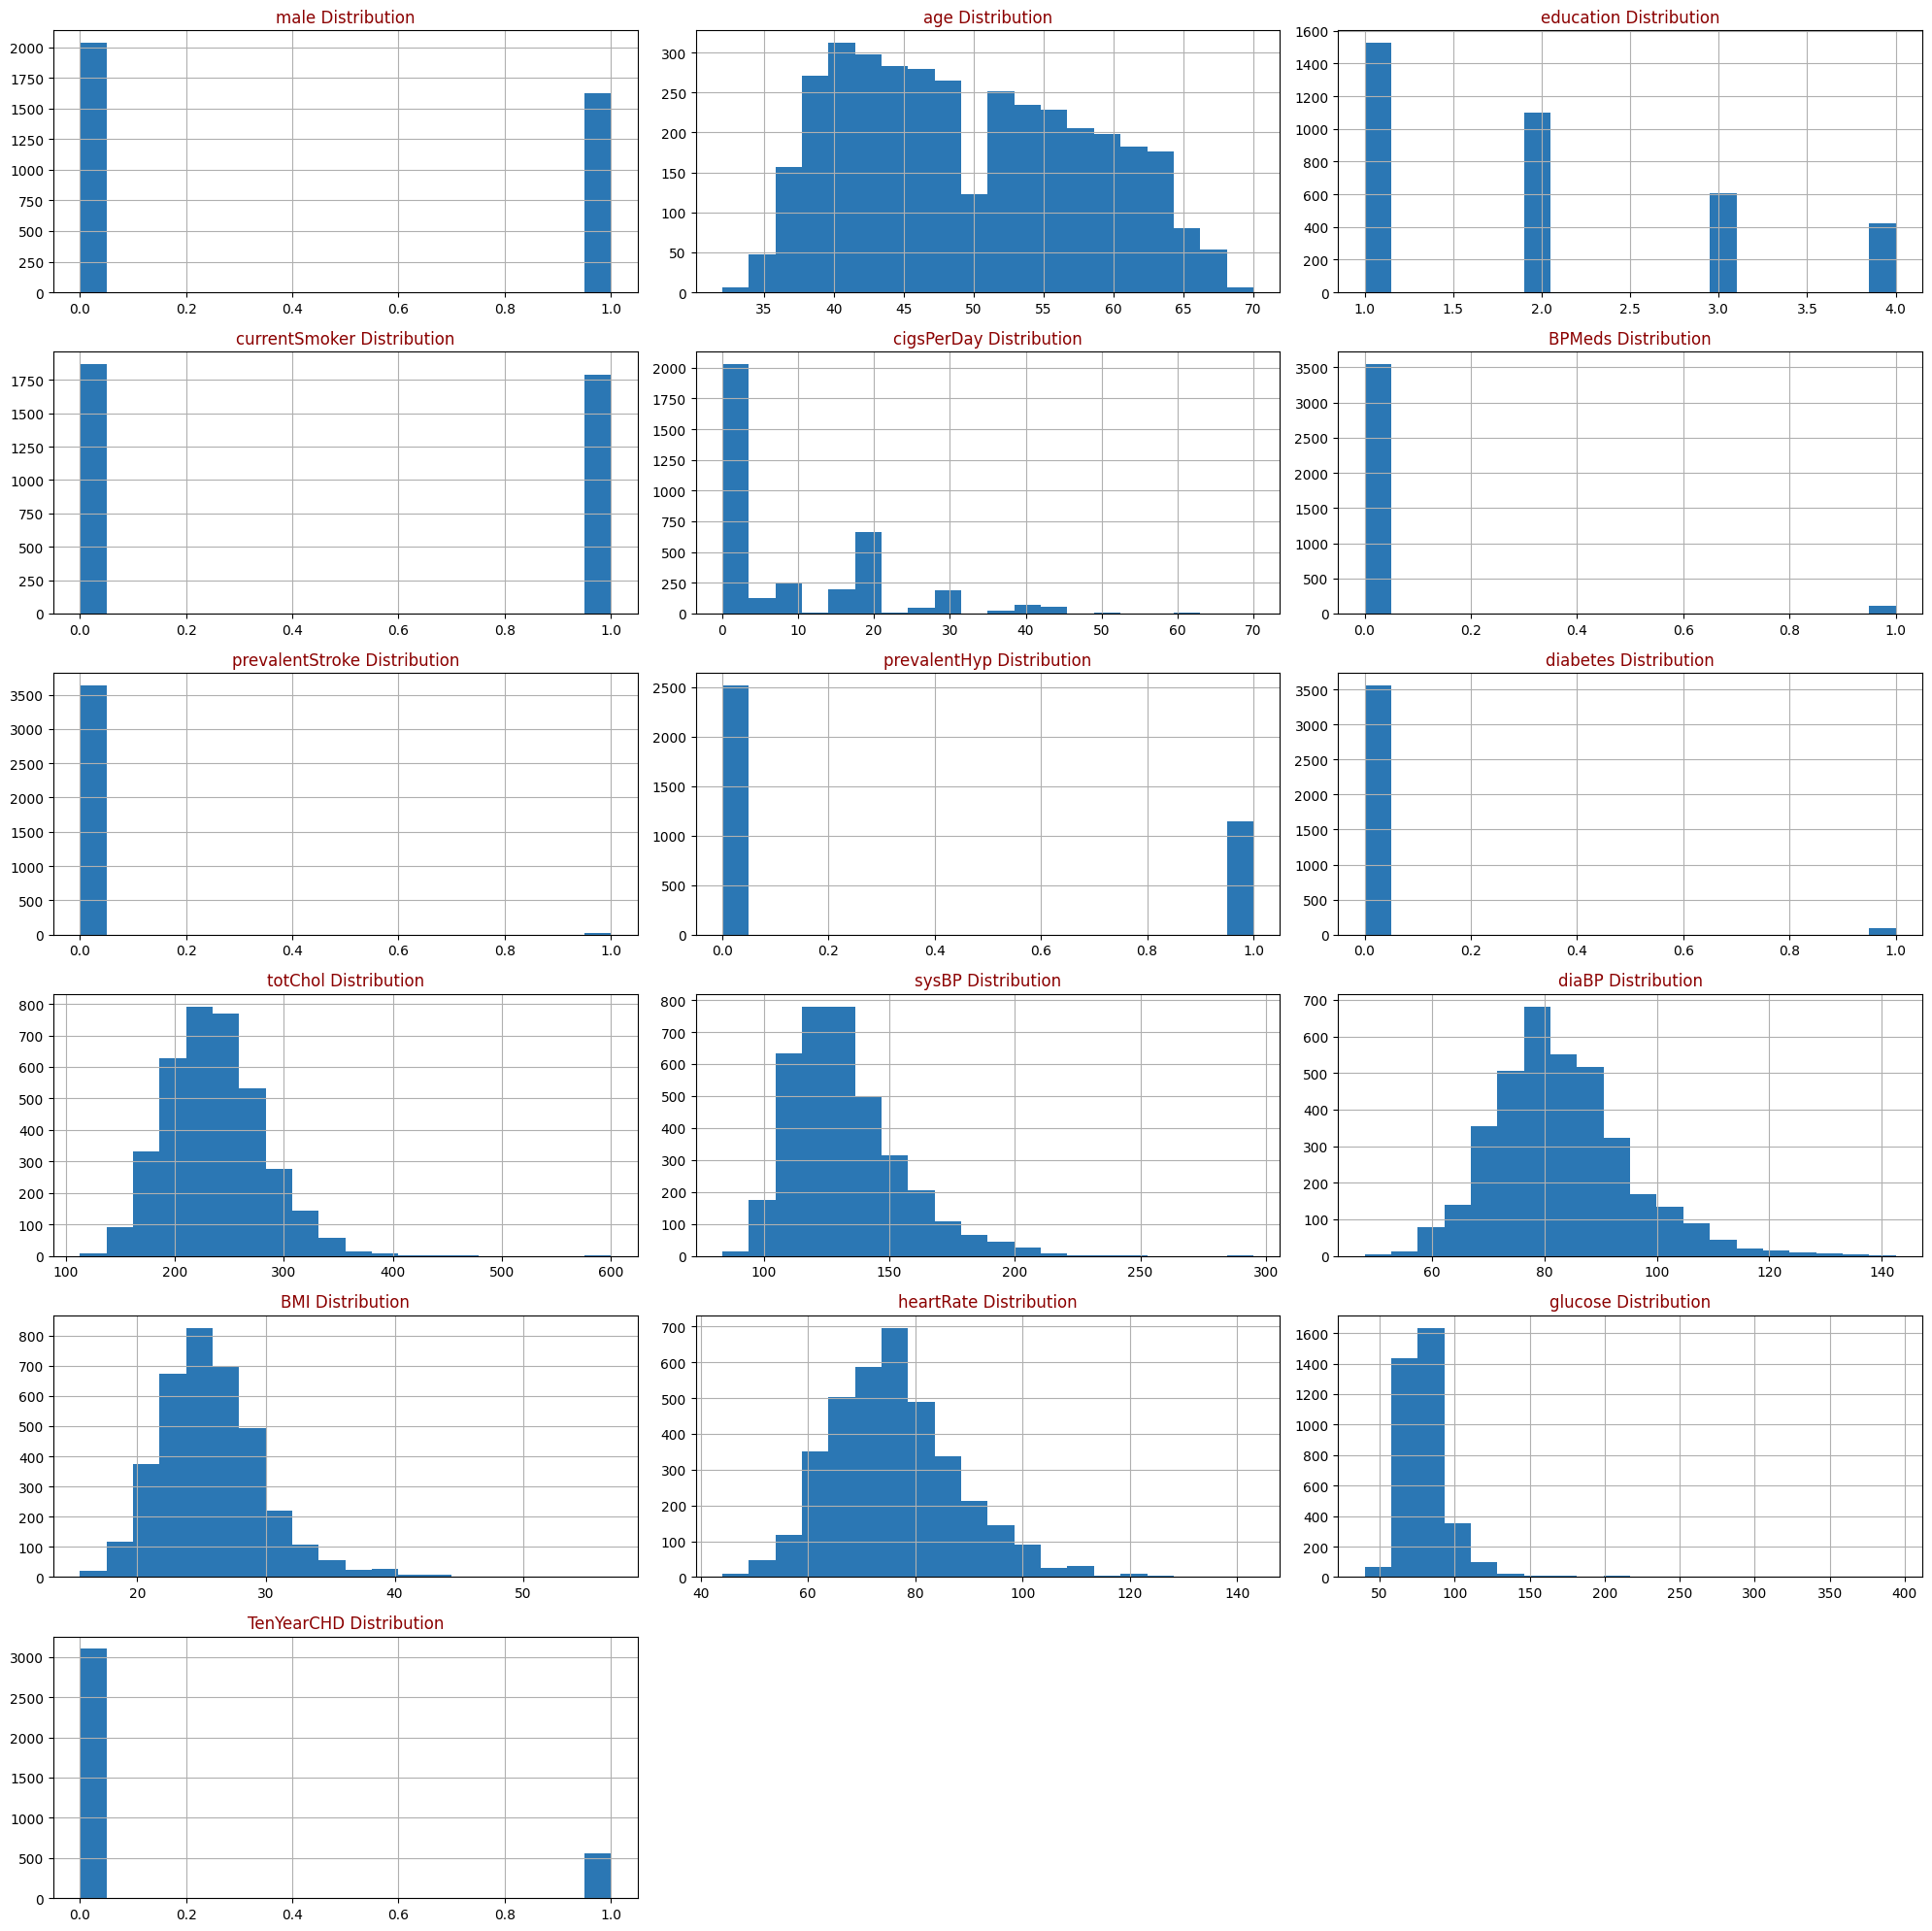

In [ ]:
import matplotlib.pyplot as plt
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins = 20,ax = ax, facecolor = '#2b77b4')
        ax.set_title(feature+" Distribution", color='DarkRed')

    fig.tight_layout()
    plt.show()
draw_histograms(framingham, framingham.columns,6, 3)

We can extract statistics for columns also by calculating different (simple) statistics.

In [ ]:
print ("The percentage of men in the data set is: ", round(sum(framingham["male"])/len(framingham)*100, 2), "%")
print ("The percentage of the instances with ten year CHD is: ", round(sum(framingham["TenYearCHD"])/len(framingham)*100, 2), "%")

The percentage of men in the data set is:  44.37 %
The percentage of the instances with ten year CHD is:  15.23 %


## Understanding the data



Seaborn's `.displot()` function to create a visualization that combines a histogram and a KDE plot to show the distribution of a variable from the `framingham` dataset, while also incorporating a grouping variable for comparison purposes.

A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analogous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

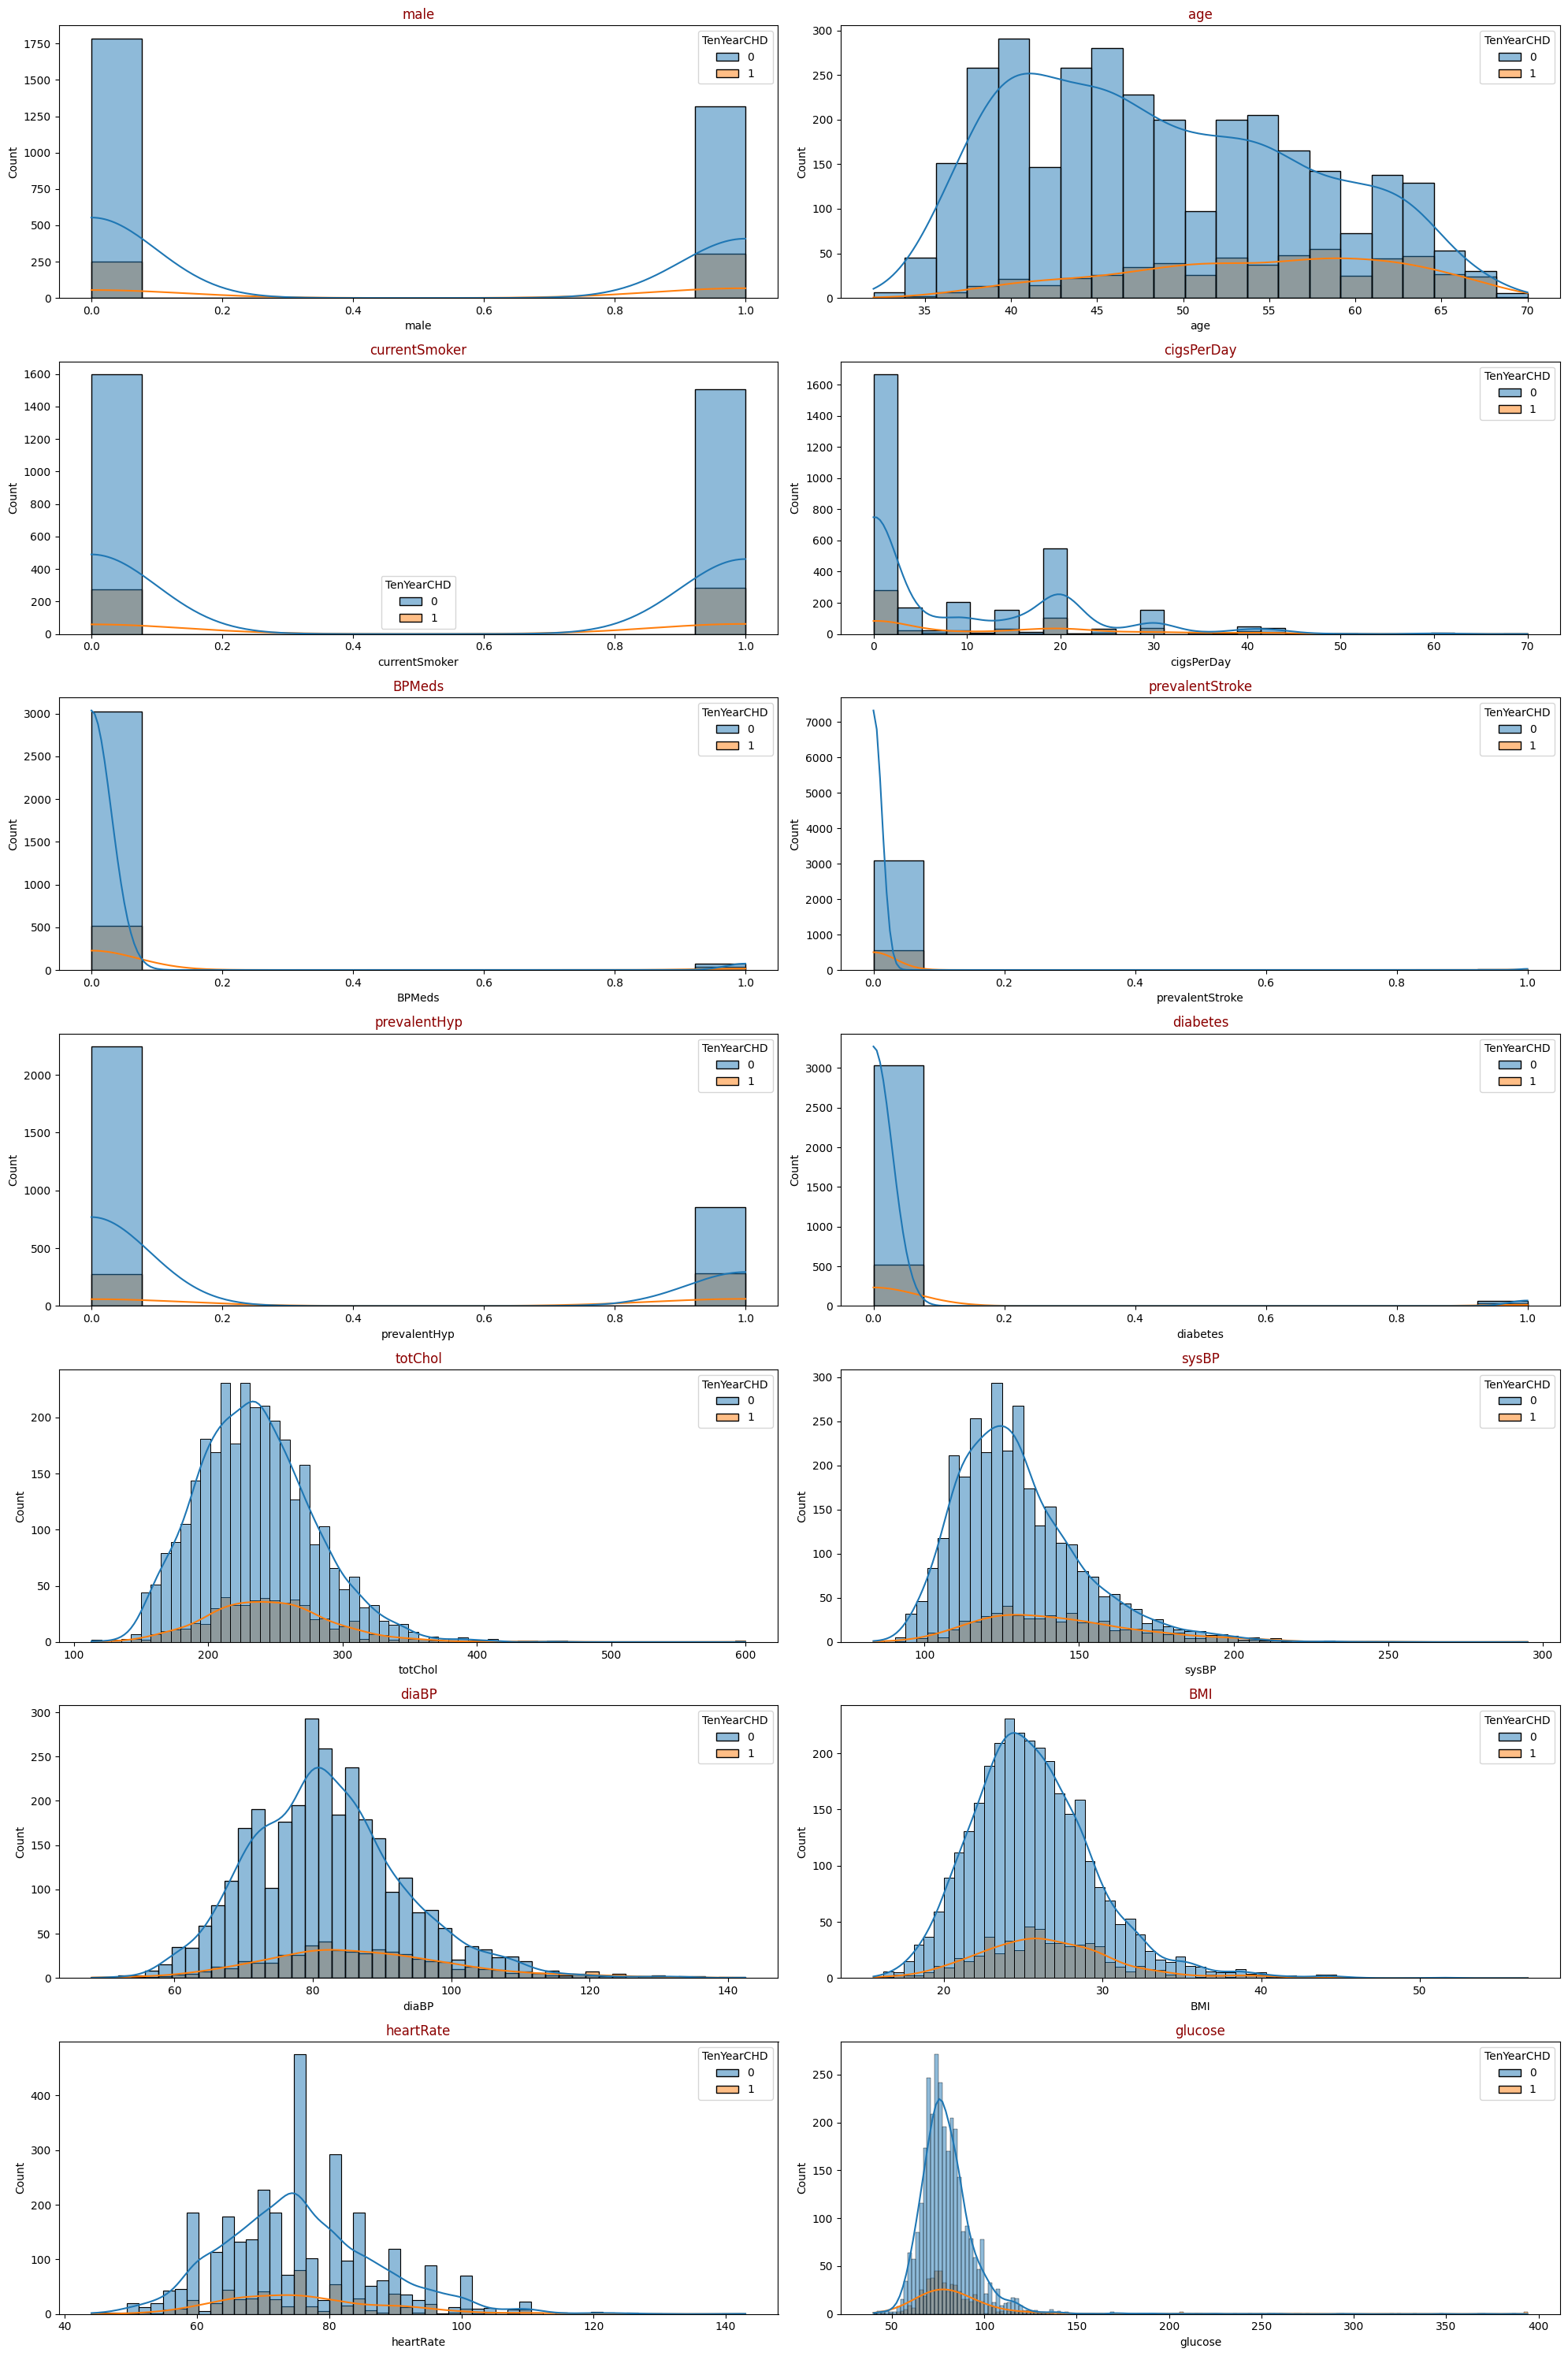

In [ ]:
features = ['male', 'age', 'currentSmoker', 'cigsPerDay',
            'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol',
            'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

fig, axes = plt.subplots(7, 2, figsize=(20, 30))
axes = axes.flatten()
for i, f in enumerate(features):
    sns.histplot(data=framingham, kde=True, x=framingham[f], hue='TenYearCHD', ax=axes[i])
    axes[i].set_title(f, color='DarkRed')
plt.tight_layout()
plt.show()

# Model Training

## Evaluation settings

Splitting our data into training and testing sets is necessary to ensure the accurate evaluation and generalization of machine learning models. The testing set provides an unbiased assessment of the model's performance on unseen data, enabling us to gauge its effectiveness in real-world scenarios. By evaluating the model's performance on the testing set, we can determine its ability to generalize beyond the training data, which is crucial for reliable predictions. Additionally, this data split helps us detect and mitigate overfitting, where the model memorizes the training data instead of learning meaningful patterns. Moreover, the separation allows for fine-tuning of hyperparameters, enhancing the model's performance. Overall, the division into train and test sets is fundamental for robust model evaluation, generalization assessment, prevention of overfitting, and effective hyperparameter tuning.

But we also have to determine the ways in which we will evaluate both the model. Such methods include using accuracy, confusion matrix, etc.

$Accuracy = \frac{\text{Number of correct predictions}}{\text{Total number of predictions}}$


We could also gain additional information by calculating the confusion matrix, which consists of:

* **True Positive (TP)**: which refers to a sample belonging to the positive class being classified correctly.
* **True Negative (TN)**: which refers to a sample belonging to the negative class being classified correctly.
* **False Positive (FP)**: which refers to a sample belonging to the negative class but being classified wrongly as belonging to the positive class.
* **False Negative (FN)**: which refers to a sample belonging to the positive class but being classified wrongly as belonging to the negative class.

![confusionmatrix](https://hackernoon.com/hn-images/1*y4HwoAEgx1Js19hCkPM7XA.png "a title")


In the context of a medical classifier for a dangerous disease, the value that is typically more useful from the confusion matrix is the **true positive (TP)** or the sensitivity/recall.

True positive (TP) represents the number of correctly classified positive cases, i.e., the instances of the CHD that were correctly identified as positive. Sensitivity or recall gives the proportion of actual positive cases that were correctly classified as positive.


$Recall = \frac{TruePositive}{TruePositive + FalseNegative}$



# The baseline

Setting a baseline is important because it provides a benchmark for comparison and helps assess the performance and effectiveness of the trained model. The baseline acts as a reference point against which the model's performance can be evaluated, allowing us to determine if the model is providing any improvement over a simple or naive approach. By establishing a baseline, we gain insights into the inherent difficulty of the problem and understand the minimum level of performance we should expect. It helps us identify whether the model is adding value and justifies the investment in training and deploying a more complex model. Additionally, the baseline can serve as a sanity check, ensuring that the model's performance is reasonable and that any observed improvements are not merely due to chance. Ultimately, establishing a baseline is a crucial step in model development, enabling us to make informed decisions and measure the true impact of our trained model.


### A simple classifier (the baseline)

The vast majority did not experience CHD. Simple baseline method - **always predict 0**!


Accuracy:

In [ ]:
3101/(3101+557)

0.8477310005467469

But in this case: **recall = 0**!

*This* is what we will compare the accuracy of our models to. For linear regression, a simple baseline is built into **R-squared**.

In some applications, a more intelligent baseline method is better. How about if we predict 1 (CHD) if the person is currently hypertensive, and predict 0 otherwise?

We'll see how well this does using a 2D table!

In [ ]:
def plot_cm_as_image(cm):
    conf_matrix=pd.DataFrame(data=cm, columns=['Predicted:0','Predicted:1'], index=['Actual:0','Actual:1'])
    plt.figure(figsize = (8,5))
    sns.heatmap(conf_matrix, annot=True, fmt='d',cmap="YlGnBu")

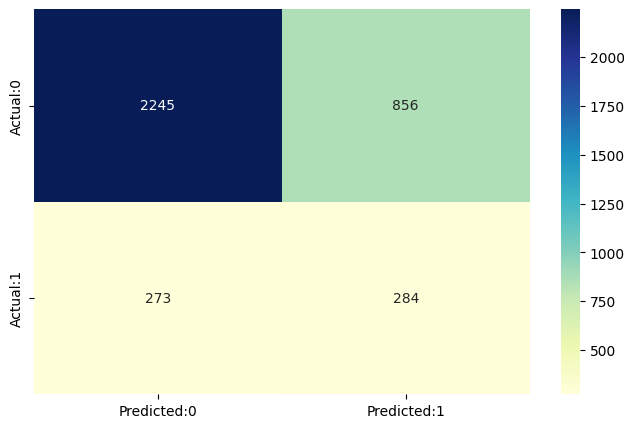

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(framingham["TenYearCHD"], framingham["prevalentHyp"])

plot_cm_as_image(cm)

In [ ]:
(2245+284)/(2245+856+273+284)

0.6913613996719519

shortcut

In [ ]:
(2245+284)/len(framingham)

0.6913613996719519

In [ ]:
print ("Recall =", 284/(273 + 284))

Recall = 0.5098743267504489


Can other attributes predict this index more precisely in terms of accuracy and recall?


|                     | **Accuracy** | **Recall** |
|---------------------|--------------|------------|
| **male**            |    0.5719    |   0.5512   |
| **currentSmoker**   |    0.5145    |   0.5117   |
| **BPMeds**          |    0.8376    |   0.0664   |
| **prevalentStroke** |    0.8464    |   0.0144   |
| **prevalentHyp**    |    0.6914    |   0.5099   |
| **diabetes**        |    0.8398    |   0.0628   |

## Preparing the experimentation


Model:

$comb = intercept + c_1 * x_1 + c_2 * x_2 + ... c_n *x_n$

$y = \frac{1}{1 + e^{-comb}}$


Now, let's split our data into a training set and a testing set using sample.split.
Why is it important to have a training set and a testing set?


Set our seed (random state) so we all get the same split!


Randomly split the data.

You typically want to put somewhere between **50%** and **80%** of the data in the training set.

Now, let's split up our data using subset:


In [5]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(framingham, test_size=0.35, random_state=88)

In [6]:
print ("Training Dataset has :", len(train), "rows")
print ("Testing Dataset has :", len(test), "rows")

Training Dataset has : 2377 rows
Testing Dataset has : 1281 rows


In [7]:
import statsmodels.api as sm

framinghamLog = sm.formula.glm("TenYearCHD ~ male + age + education + currentSmoker + cigsPerDay + BPMeds + prevalentStroke + prevalentHyp + diabetes + totChol + sysBP + diaBP + BMI + heartRate + glucose",
                       family=sm.families.Binomial(),
                       data=train).fit()
print(framinghamLog.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             TenYearCHD   No. Observations:                 2377
Model:                            GLM   Df Residuals:                     2361
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -906.78
Date:                Mon, 03 Jul 2023   Deviance:                       1813.6
Time:                        10:53:45   Pearson chi2:                 2.36e+03
No. Iterations:                     5   Pseudo R-squ. (CS):            0.09035
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -6.9052      0.869     

#### Interpetation of these values

- **coef**: This column displays the estimated coefficients for each attribute in the model. Coefficients represent the magnitude and direction of the effect of each attribute on the response. They indicate the average change in the response for a one-unit change in the corresponding attribute, assuming all other attributes are held constant.

- **std err**: The standard error column represents the estimated standard deviation of the coefficient estimate. It quantifies the uncertainty or variability associated with the coefficient estimation. Smaller standard errors indicate more precise coefficient estimates.

- **z**: The z-score column represents the ratio of the coefficient estimate to its standard error. It measures how many standard deviations the coefficient estimate is away from zero. The z-score is used to assess the significance of the coefficient, as explained in the next column.

- **P>|z|**: The p-value column provides the probability of observing a coefficient as extreme as or more extreme than the estimated value, assuming the null hypothesis that the coefficient is equal to zero. It indicates the statistical significance of the coefficient estimate. Lower p-values (typically below a certain threshold like 0.05) suggest stronger evidence against the null hypothesis and indicate a significant effect of the predictor on the response variable.

- **[0.025 0.975]**: This column represents the lower and upper bounds of the confidence interval for the coefficient estimate. The confidence interval provides a range of plausible values for the true population coefficient. The commonly used 95% confidence interval is displayed here, meaning that it provides a range within which we can be 95% confident that the true coefficient lies.

More information on these values can be found [here](https://medium.com/swlh/interpreting-linear-regression-through-statsmodels-summary-4796d359035a).




<hr>

**<font color=RoyalBlue>Practically:<font>**
- This fitted model shows that, holding all other features constant, the odds of getting diagnosed with heart disease for males (sex_male = 1) over that of females (sex_male = 0) is **exp(0.5545) = 1.741**. In terms of percent change, we can say that **the odds for males are 74.1% higher than the odds for females**.

- The coefficient for age says that, holding all others constant, we will see **6% increase in the odds of getting diagnosed with CDH for a one year increase in age** since exp(0.0557) = 1.05728.


- Similarly , with **every extra cigarette per day one smokes thers is a 1.43% increase in the odds of CDH**.

- There is a **1.5% increase in odds for every unit increase in systolic Blood Pressure**.

<hr>

In [ ]:
import numpy as np

def predict_chd(x):
    coefficients = framinghamLog.params
    intercept = coefficients[0]
    feature_coeffs = coefficients[1:]

    # Perform the linear combination of features and coefficients
    linear_combination = intercept + np.dot(x, feature_coeffs)

    # Apply the sigmoid function to get the predicted probability
    probability = 1 / (1 + np.exp(-linear_combination))

    return probability


predict_chd([train.iloc[10].tolist()[:-1]])[0]

0.07596087607173022

In [ ]:
framinghamLog.predict(train.iloc[10]).iloc[0]

0.07596087607173022

### Test

Now, lets use this model to make predictions on our test set:

In [ ]:
predictTestProbs = framinghamLog.predict(test)
predictTest = [0 if i <0.5 else 1 for i in predictTestProbs]

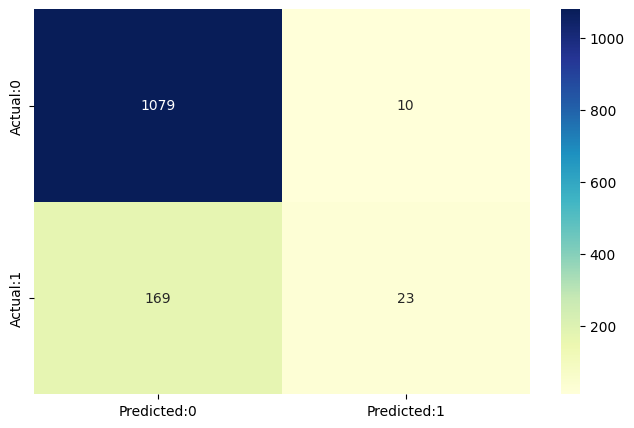

In [ ]:
cm = confusion_matrix(test["TenYearCHD"].tolist(), predictTest)
plot_cm_as_image(cm)

The confusion matrix shows 658+4 = 662 correct predictions and 88+1= 89 incorrect ones.

**<font color=DarkBlue>True Positives:**  23<font>

**<font color=DarkBlue>True Negatives:**  1079 <font>

**<font color=DarkBlue>False Positives:** 10 (*Type I error*)<font>

**<font color=DarkBlue>False Negatives:** 169 ( *Type II error*)<font>



With a threshold of 0.5, we predict an outcome of 1 very rarely. This means that our model rarely predicts a Ten Year CHD risk above 50%.

What is our accuracy?

In [ ]:
(1079+23)/(1079+10+169+23)

0.8602654176424668

Shortcut

In [ ]:
(1079+23)/len(predictTest)

0.8602654176424668

In [ ]:
print ("Recall =", 23/(23 + 169))

Recall = 0.11979166666666667


But if we used different threshold?

Let's experiment some more.

#### Threshold = 0.4

In [ ]:
predictTestProbs = framinghamLog.predict(test)
predictTest = [0 if i <0.4 else 1 for i in predictTestProbs]

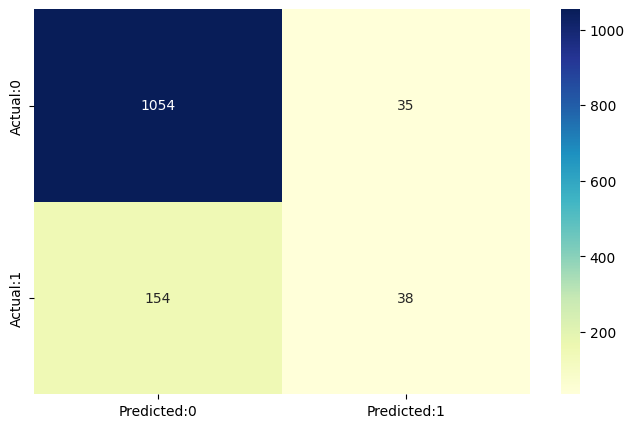

In [ ]:
cm = confusion_matrix(test["TenYearCHD"].tolist(), predictTest)
plot_cm_as_image(cm)

In [ ]:
(1054+38)/(1054+35+154+38)

0.8524590163934426

In [ ]:
print ("Recall =", 38/(38 + 154))

Recall = 0.19791666666666666


#### Theshold = 0.3

In [ ]:
predictTestProbs = framinghamLog.predict(test)
predictTest = [0 if i <0.3 else 1 for i in predictTestProbs]

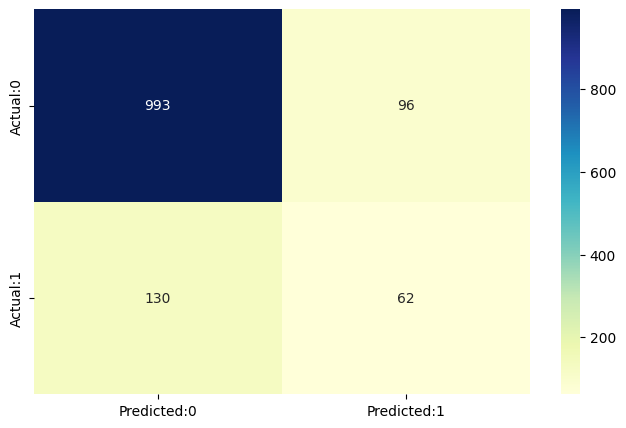

In [ ]:
cm = confusion_matrix(test["TenYearCHD"].tolist(), predictTest)
plot_cm_as_image(cm)

In [ ]:
(993+62)/(993+96+130+62)

0.8235753317720531

In [ ]:
print ("Recall =", 62/(62 + 130))

Recall = 0.3229166666666667


By reducing the threshold, the accuracy diminishes, while with an increase in the number of correctly classified positive instances.



*   Threshold=0.5: **Number of correctly classified positive instances = 23**
*   Threshold=0.4: **Number of correctly classified positive instances = 38**
*   Threshold=0.3: **Number of correctly classified positive instances = 62**


Nevertheless, this downward adjustment cannot be sustained indefinitely, as setting the threshold to zero, for instance, would yield a perfect classification of positive instances, but concurrently result in a higher occurrence of erroneously classified instances as positive. Therefore, it becomes imperative to identify a threshold that strikes a balance between the true positive rate and the false positive rate.

So our model barely beats the baseline. But do we still have a valuable model by varying the threshold? Let's create an ROC curve for the test set.

### ROC Curve

So our model barely beats the baseline. But do we still have a valuable model by varying the threshold?

#### What ROC Curve shows?

A Receiver Operating Characteristic (ROC) curve is a graphical representation of the performance of a binary classifier system. The ROC curve plots the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.

The true positive rate is the proportion of actual positive cases that are correctly identified as such (also known as sensitivity or recall). The false positive rate is the proportion of actual negative cases that are incorrectly identified as positive (also known as the fall-out).

The ROC curve shows the trade-off between the true positive rate and the false positive rate for different threshold settings of a binary classifier. A classifier that makes no mistakes will have a ROC curve that passes through the upper left corner of the plot (i.e., an AUC of 1), whereas a classifier that is no better than random guessing will have a ROC curve that is a diagonal line (i.e., an AUC of 0.5).

ROC curve is a powerful tool to evaluate the performance of a classifier, as it shows the trade-off between the true positive rate and the false positive rate, and it allows us to visualize the performance of the classifier across a range of threshold settings.



Let's create an ROC curve for the test set.

Need 8 lines of code to create ROC curve:

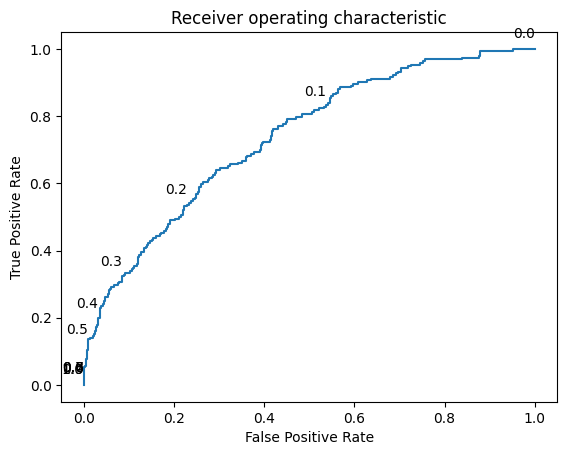

In [ ]:
import numpy as np
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(test["TenYearCHD"].tolist(),  predictTestProbs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')

# Add cutoffs
cutoffs = np.arange(0,1.1,0.1)
for c in cutoffs:
    plt.annotate('%.1f' % c, (fpr[thresholds > c][-1], tpr[thresholds > c][-1]), textcoords='offset points', xytext=(-8,8), ha='center', fontsize=10)
plt.show()

It looks like we do have a good model!

Let's compute the out-of-sample AUC.

#### What Area Under the Curve Score shows?

The area under the ROC curve (AUC) is a performance metric for binary classification problems. It represents the degree to which the predicted probabilities of a model are able to distinguish between the true positive and true negative instances.

An AUC of 1 represents a perfect classifier, while an AUC of 0.5 represents a classifier that performs no better than random guessing. AUC is independent of the threshold used to convert predicted probabilities into binary predictions.

In other words, AUC represents the probability that a classifier will rank a randomly chosen positive instance higher than a randomly chosen negative one. So, a higher AUC score indicates a better performance of the model in terms of distinguishing the positive and negative instances.

In [ ]:
roc_auc_score(test["TenYearCHD"].tolist(),  predictTestProbs)

0.736192416590144

Let's experiment with the model's hyperparameters!

The results above (summary) show that some of the attributes are important for the classification. For this reason, we can attempt to remove some of the input attributes from the model such as **education** etc.

In [ ]:
import statsmodels.api as sm

framinghamLog = sm.formula.glm("TenYearCHD ~ male + age + currentSmoker + cigsPerDay + BPMeds + prevalentStroke + prevalentHyp + diabetes + totChol + sysBP + glucose",
                       family=sm.families.Binomial(),
                       data=train).fit()

predictTestProbs = framinghamLog.predict(test)
roc_auc_score(test["TenYearCHD"].tolist(),  predictTestProbs)

0.7400998622589533

If we remove important columns like **cigsPerDay** and **gender**, what will happen to the ROC score?

In [ ]:
import statsmodels.api as sm

framinghamLog = sm.formula.glm("TenYearCHD ~ age  + currentSmoker + BPMeds + prevalentStroke + prevalentHyp + diabetes + totChol + sysBP  + glucose",
                       family=sm.families.Binomial(),
                       data=train).fit()
predictTestProbs = framinghamLog.predict(test)
roc_auc_score(test["TenYearCHD"].tolist(),  predictTestProbs)

0.7270383761861035


## <font color=RoyalBlue> Conclusions:</font>


- Men seem to be more susceptible to heart disease than women. Increase in Age,number of cigarettes smoked per day and systolic Blood Pressure also show increasing odds of having heart disease.

- We can eliminate attributes from the model that are not important for predicting the disease.

- Different values of thresholds may significantly change the accuracy of the model.

- The Area under the ROC curve is 0.74 which is satisfactory.

- Overall model could be improved with more data and experimentation.
